<a href="https://colab.research.google.com/github/KaustubhVaidya404/herbclassifier/blob/main/herbclassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
import tensorflow as tf
import os
import keras
from keras import layers

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/My Drive/Kaggle"

In [4]:
!kaggle datasets download -d aryashah2k/indian-medicinal-leaves-dataset

indian-medicinal-leaves-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [5]:
#!unzip '/content/indian-medicinal-leaves-dataset.zip'

In [6]:
batch_size = 32
img_height = 180
img_width = 180

In [7]:
train_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset',
  validation_split=0.2,
  subset="training",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6900 files belonging to 80 classes.
Using 5520 files for training.


In [8]:
val_ds = tf.keras.utils.image_dataset_from_directory(
  '/content/Indian Medicinal Leaves Image Datasets/Medicinal Leaf dataset',
  validation_split=0.2,
  subset="validation",
  seed=123,
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6900 files belonging to 80 classes.
Using 1380 files for validation.


In [9]:
class_names = train_ds.class_names
print(class_names)

file = open('labels.txt', 'w')

for val in class_names:
  file.write(val+'\n')

file.close()

['Aloevera', 'Amla', 'Amruthaballi', 'Arali', 'Astma_weed', 'Badipala', 'Balloon_Vine', 'Bamboo', 'Beans', 'Betel', 'Bhrami', 'Bringaraja', 'Caricature', 'Castor', 'Catharanthus', 'Chakte', 'Chilly', 'Citron lime (herelikai)', 'Coffee', 'Common rue(naagdalli)', 'Coriender', 'Curry', 'Doddpathre', 'Drumstick', 'Ekka', 'Eucalyptus', 'Ganigale', 'Ganike', 'Gasagase', 'Ginger', 'Globe Amarnath', 'Guava', 'Henna', 'Hibiscus', 'Honge', 'Insulin', 'Jackfruit', 'Jasmine', 'Kambajala', 'Kasambruga', 'Kohlrabi', 'Lantana', 'Lemon', 'Lemongrass', 'Malabar_Nut', 'Malabar_Spinach', 'Mango', 'Marigold', 'Mint', 'Neem', 'Nelavembu', 'Nerale', 'Nooni', 'Onion', 'Padri', 'Palak(Spinach)', 'Papaya', 'Parijatha', 'Pea', 'Pepper', 'Pomoegranate', 'Pumpkin', 'Raddish', 'Rose', 'Sampige', 'Sapota', 'Seethaashoka', 'Seethapala', 'Spinach1', 'Tamarind', 'Taro', 'Tecoma', 'Thumbe', 'Tomato', 'Tulsi', 'Turmeric', 'ashoka', 'camphor', 'kamakasturi', 'kepala']


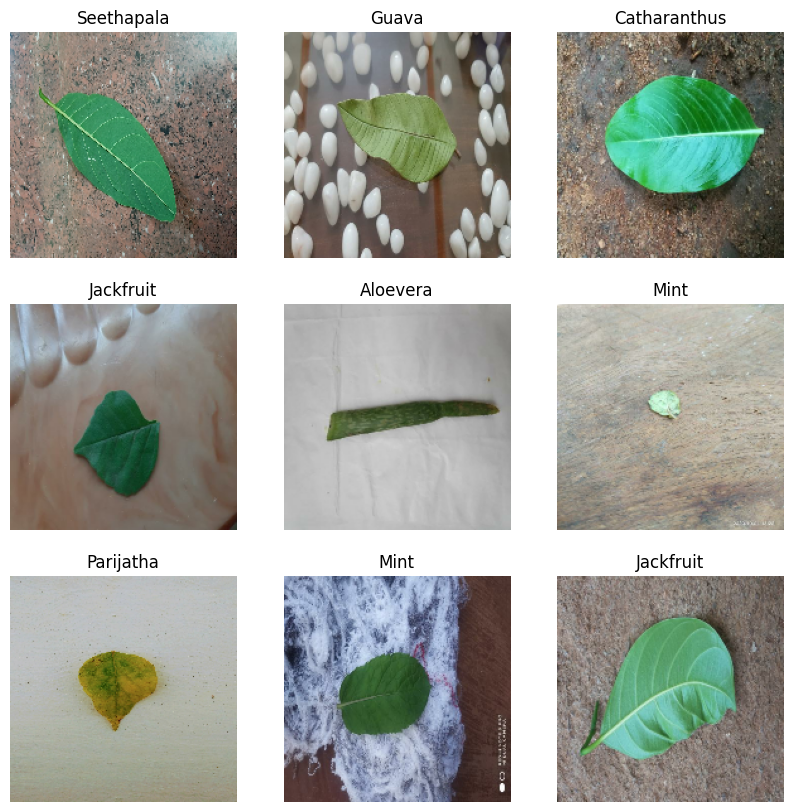

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

In [11]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


In [12]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [13]:
normalization_layer = layers.Rescaling(1./255)

In [14]:
num_classes = len(class_names)

model = tf.keras.models.Sequential([
  layers.Rescaling(1./255, input_shape=(img_height, img_width, 3)),
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

In [15]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_1 (Rescaling)     (None, 180, 180, 3)       0         
                                                                 
 conv2d (Conv2D)             (None, 180, 180, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 90, 90, 16)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 90, 90, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 45, 45, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 45, 45, 64)        1

In [17]:
epochs=20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
173/173 [==============================] - 208s 245ms/step - loss: 4.1686 - accuracy: 0.0540 - val_loss: 3.8521 - val_accuracy: 0.0877
Epoch 2/20
173/173 [==============================] - 4s 21ms/step - loss: 3.4385 - accuracy: 0.1739 - val_loss: 3.1739 - val_accuracy: 0.2036
Epoch 3/20
173/173 [==============================] - 4s 21ms/step - loss: 2.6521 - accuracy: 0.3248 - val_loss: 2.6528 - val_accuracy: 0.3312
Epoch 4/20
173/173 [==============================] - 3s 20ms/step - loss: 2.0319 - accuracy: 0.4707 - val_loss: 2.3844 - val_accuracy: 0.3920
Epoch 5/20
173/173 [==============================] - 4s 23ms/step - loss: 1.4722 - accuracy: 0.6082 - val_loss: 2.3186 - val_accuracy: 0.4551
Epoch 6/20
173/173 [==============================] - 4s 20ms/step - loss: 1.1007 - accuracy: 0.6917 - val_loss: 2.3685 - val_accuracy: 0.4536
Epoch 7/20
173/173 [==============================] - 4s 21ms/step - loss: 0.7217 - accuracy: 0.7953 - val_loss: 2.3856 - val_accuracy: 0.4

In [18]:
# Convert the model.
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

# Save the model.
with open('model.tflite', 'wb') as f:
  f.write(tflite_model)

In [19]:
TF_MODEL_FILE_PATH = 'model.tflite' # The default path to the saved TensorFlow Lite model

interpreter = tf.lite.Interpreter(model_path=TF_MODEL_FILE_PATH)

In [20]:
interpreter.get_signature_list()

{'serving_default': {'inputs': ['rescaling_1_input'], 'outputs': ['dense_1']}}

In [29]:
from tensorflow.keras.preprocessing import image
import numpy as np
from google.colab import files

uploaded_files = files.upload()

for path in uploaded_files.keys():
  input_image = image.load_img(path, target_size = (180, 180))
  image_values = image.img_to_array(input_image)
  dimension_corrected = np.expand_dims(image_values, axis = 0)
  prediction = model.predict(dimension_corrected)
  argmax_value = np.argmax(prediction)
  print(argmax_value)

Saving leamon.jpeg to leamon.jpeg
1/1 [==============================] - 0s 18ms/step
54
